In [98]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader

import os
for dirname,_,filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [99]:
df=pd.read_csv("datasets/Web_page_Phishing_Detection_Dataset/dataset_phishing.csv")

In [100]:
# removing url features
df=df.drop(labels="url",axis=1)

In [101]:
class_labels=df['status'].unique().tolist()
class_labels.sort()
print(class_labels)

['legitimate', 'phishing']


In [102]:
class_dict={}
for idx,label in enumerate(class_labels):
    class_dict[label]=idx
print(class_dict)

{'legitimate': 0, 'phishing': 1}


In [103]:
# label encoding
df['status']=df['status'].map(class_dict)
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,0


In [104]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [105]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6


In [106]:
y.head()

,status
0,0
1,1
2,1
3,0
4,0


In [107]:
# data normalization using MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X.values)
X_scaled=scaler.transform(X.values)
print(X_scaled)

[[0.01534684 0.07142857 0.         ... 1.         1.         0.4       ]
 [0.03990178 0.09047619 1.         ... 0.         1.         0.2       ]
 [0.06998158 0.21904762 1.         ... 0.         1.         0.        ]
 ...
 [0.05709024 0.05714286 1.         ... 0.         1.         1.        ]
 [0.01596071 0.12380952 0.         ... 0.         0.         0.4       ]
 [0.2854512  0.04761905 1.         ... 1.         1.         0.        ]]


In [108]:
new_X=pd.DataFrame(data=X_scaled,columns=X.columns)
new_X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,0.015347,0.071429,0.0,0.086957,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.028571,0.027397,0.066667,0.052632,0.075,0.010883,0.163934,0.007238,0.029703,0.157895,0.018000,0.0,0.0,0.0,0.0,0.0,0.0,0.003649,0.529412,0.470588,0.0,0.0,0.0,0.437500,0.0,0.500000,0.0,0.0,0.800000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.001542,0.000854,0.000000,1.0,1.0,0.4
1,0.039902,0.090476,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.304994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.028571,0.027397,0.033333,0.473684,0.050,0.036276,0.295082,0.038601,0.108911,0.473684,0.058667,0.0,0.0,0.0,0.0,0.0,0.0,0.006439,0.966667,0.033333,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.800000,0.200000,0.0,0.0,0.0,1.000,0.0,0.0,0.0,1.0,0.0,0.0,0.002615,0.448471,0.000000,0.0,1.0,0.2
2,0.069982,0.219048,1.0,0.130435,0.023256,0.0,0.333333,0.105263,0.0,0.157895,0.111111,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.208313,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.166667,0.0,0.104762,0.013699,0.033333,0.052632,0.050,0.018138,0.196721,0.020507,0.049505,0.194737,0.032571,0.0,0.0,0.0,0.0,0.0,0.0,0.000859,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000,0.0,0.0,0.0,1.0,0.0,0.0,0.000503,0.311656,0.541310,0.0,1.0,0.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.133333,0.105263,0.000,0.003628,0.065574,0.000000,0.023762,0.105263,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031981,0.973154,0.026846,0.0,0.0,0.0,0.125000,0.0,0.250000,0.0,0.0,1.000000,0.0,0.964286,0.035714,0.0,0.0,0.0,0.625,0.0,0.0,0.0,1.0,0.0,0.0,0.002112,0.000854,0.010004,0.0,0.0,0.3
4,0.026397,0.052381,0.0,0.043478,0.046512,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.166667,0.0,0.047619,0.020548,0.066667,0.052632,0.100,0.010883,0.098361,0.013269,0.034323,0.105263,0.028000,0.0,0.0,0.0,0.0,0.0,0.0,0.021893,0.470588,0.529412,0.0,0.0,0.0,0.268519,0.0,0.018519,1.0,0.0,0.764706,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.007543,0.635341,0.000810,0.0,0.0,0.6


In [109]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(9144, 87) (9144, 1) (2286, 87) (2286, 1)


In [110]:
train_input_tensor=torch.from_numpy(X_train.values).float()
train_label_tensor=torch.from_numpy(y_train['status'].values).float()
val_input_tensor=torch.from_numpy(X_test.values).float()
val_label_tensor=torch.from_numpy(y_test['status'].values).float()

In [111]:
train_label_tensor=train_label_tensor.unsqueeze(1)
train_label_tensor

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [112]:
val_label_tensor=val_label_tensor.unsqueeze(1)
val_label_tensor

tensor([[1.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]])

In [113]:
# wrapping training tensors and validation tensors
train_dataset=TensorDataset(train_input_tensor,train_label_tensor)
val_dataset=TensorDataset(val_input_tensor,val_label_tensor)

In [114]:
# performing splitting tensors into batches and shuffling the data and making wrapped tensors as iterative
train_loader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
val_loader=DataLoader(dataset=val_dataset,batch_size=32,shuffle=True)

In [115]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [116]:
class MLP(nn.Module):
    def __init__(self,dropout=0.4):
        super(MLP,self).__init__()
        self.network=nn.Sequential(
            nn.Linear(in_features=87,out_features=300), # in_feature value is 87. because this dataset has 87 independent features
            nn.ReLU(),
            nn.BatchNorm1d(num_features=300),
            nn.Dropout(p=dropout),
            
            nn.Linear(in_features=300,out_features=100),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=100),
            
            nn.Linear(in_features=100,out_features=1),
            nn.Sigmoid()
        )
    def forward(self,x):
        x=self.network(x)
        return x

In [117]:
model=MLP(dropout=0.4)
print(model)

MLP(
  (network): Sequential(
    (0): Linear(in_features=87, out_features=300, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=300, out_features=100, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=100, out_features=1, bias=True)
    (8): Sigmoid()
  )
)


In [118]:
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)
criterion=nn.BCELoss()

In [119]:
def train_loop(model,train_loader,val_loader,device,optimizer,criterion,batch_size,epochs):
    model=model.to(device)
    train_batch_size=len(train_loader)
    val_batch_size=len(val_loader)
    
    history={"train_accuracy":[],"train_loss":[],"val_accuracy":[],"val_loss":[]}
    
    for epoch in range(epochs):
        model.train() # training mode
        
        train_accuracy=0
        train_loss=0
        val_accuracy=0
        val_loss=0
        
        for X,y in train_loader:
            X=X.to(device)
            y=y.to(device)
            
            # forward propagation
            outputs=model(X)
            pred=torch.round(outputs)
            
            # loss computation
            loss=criterion(outputs,y)
            
            # backward propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            cur_train_loss=loss.item()
            cur_train_accuracy=(pred==y).sum().item()/batch_size
            
            train_accuracy+=cur_train_accuracy
            train_loss+=cur_train_loss
        model.eval()
        with torch.no_grad():
            for X,y in val_loader:
                X=X.to(device)
                y=y.to(device)
                
                outputs=model(X)
                pred=torch.round(outputs)
                
                loss=criterion(outputs,y)
                
                cur_val_loss=loss.item()
                cur_val_accuracy=(pred==y).sum().item()/batch_size
                
                val_accuracy+=cur_val_accuracy
                val_loss+=cur_val_loss
        train_accuracy=train_accuracy/train_batch_size
        train_loss=train_loss/train_batch_size
        val_accuracy=val_accuracy/val_batch_size
        val_loss=val_loss/val_batch_size
        
        print(f"[{epoch+1:>3d}/{epochs:>3d}], train_accuracy:{train_accuracy:>5f}, train_loss:{train_loss:>5f}, val_accuracy:{val_accuracy:>5f}, val_loss:{val_loss:>5f}")
        
        history['train_accuracy'].append(train_accuracy)
        history['train_loss'].append(train_loss)
        history['val_accuracy'].append(val_accuracy)
        history['val_loss'].append(val_loss)
    PATH="trained_model.pt"
    torch.save(model.state_dict(),PATH)
    return history
            

In [120]:
history=train_loop(model,train_loader,val_loader,device,optimizer,criterion,batch_size=32,epochs=100)

[  1/100], train_accuracy:0.917614, train_loss:0.208336, val_accuracy:0.928385, val_loss:0.173042
[  2/100], train_accuracy:0.940013, train_loss:0.161440, val_accuracy:0.927517, val_loss:0.159387
[  3/100], train_accuracy:0.943510, train_loss:0.148667, val_accuracy:0.938368, val_loss:0.142991
[  4/100], train_accuracy:0.950393, train_loss:0.135865, val_accuracy:0.936198, val_loss:0.148599
[  5/100], train_accuracy:0.950284, train_loss:0.129911, val_accuracy:0.940538, val_loss:0.142892
[  6/100], train_accuracy:0.955201, train_loss:0.123168, val_accuracy:0.941840, val_loss:0.141342
[  7/100], train_accuracy:0.956294, train_loss:0.119977, val_accuracy:0.948351, val_loss:0.131776
[  8/100], train_accuracy:0.955420, train_loss:0.119501, val_accuracy:0.948351, val_loss:0.173139
[  9/100], train_accuracy:0.954327, train_loss:0.120273, val_accuracy:0.947483, val_loss:0.131854
[ 10/100], train_accuracy:0.957823, train_loss:0.113753, val_accuracy:0.944878, val_loss:0.136134
[ 11/100], train_acc

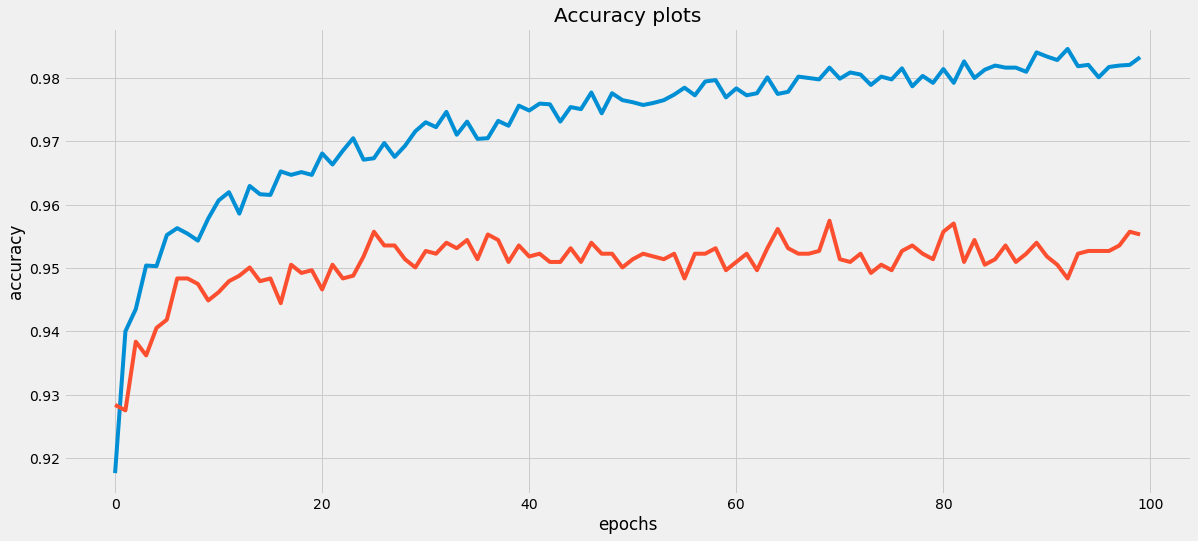

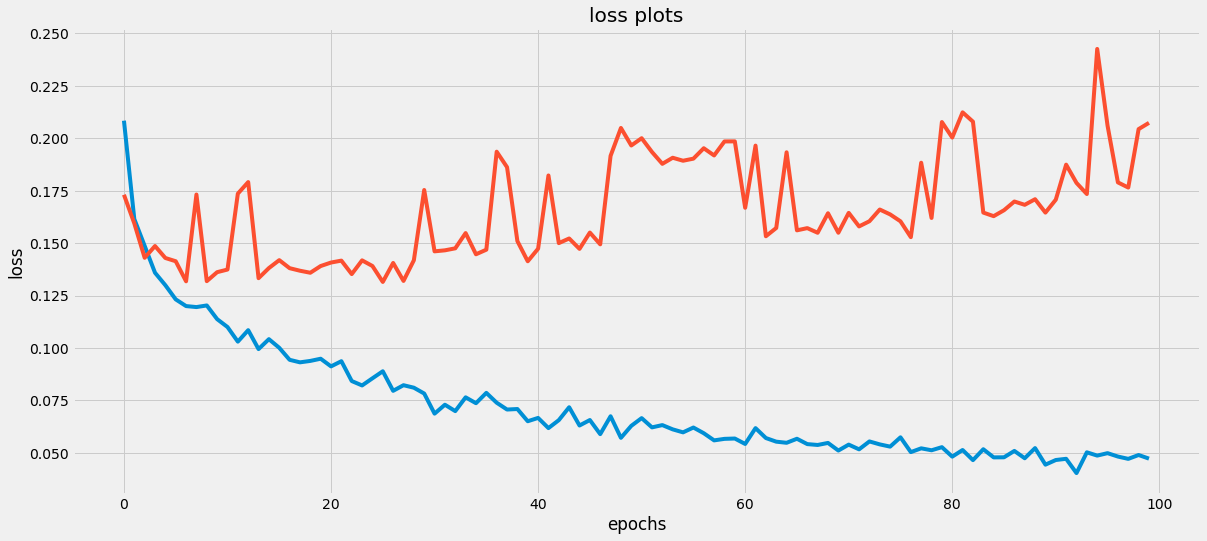

In [121]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.plot(history['train_accuracy'],label="train accuracy")
    plt.plot(history['val_accuracy'],label="val accuracy")
    plt.title(label="Accuracy plots")
    plt.xlabel(xlabel='epochs')
    plt.ylabel(ylabel='accuracy')
    plt.show()
    
    plt.figure(figsize=(18,8))
    plt.plot(history['train_loss'],label="train loss")
    plt.plot(history['val_loss'],label="val loss")
    plt.title(label="loss plots")
    plt.xlabel(xlabel='epochs')
    plt.ylabel(ylabel='loss')
    plt.show()

## I hope you learned something new...